In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# One hot encoding in pandas: pd.get_dummies(series, drop_first=True)
# for categorical data that is multi-categorical, drop_first=False

In [2]:
df = pd.read_csv('apartments_data_checkpoint_09-22-2021-14-24-55.csv')
df.head()

,address,city,state,zipcode,neighborhood,price,bdrms,baths,sq_ft,date,uniques,other_amenities,details,other_details,schools,transportation
0,2148 Broderick St,San Francisco,CA,94115,Pacific Heights,"1,995",Studio bd,1 ba,204 sq ft,1895,"['Academy of Art University', '7 min', '2.5 mi']","['Cable Ready', 'Refrigerator', 'Window Coveri...",['Microwave'],['17 units/4 stories'],"['University of California, San Francisco', '3...","['University of San Francisco', '5 min', '1.4 ..."
1,9337 National Blvd,Los Angeles,CA,90034,Cheviot Hills,"3,350",2 bd,2 ba,900 sq ft,1964,"['The Art Institute of California, Los Angeles...",['Off Street Parking For 1 Vehicle'],"['Laundry Facilities', 'Gated', 'High Speed In...","['Water', 'Trash Removal', '9 units/2 stories']","['West Los Angeles College', '8 min', '2.8 mi']","['Santa Monica College', '9 min', '3.9 mi']"
2,10063 Mountair Ave,Tujunga,CA,91042,Tujunga,"1,995",2 bd,1 ba,830 sq ft,1987,"['New York Film Academy', '22 min', '12.1 mi']","['Sun Valley', '13 min', '7.2 mi']","['Bob Hope', '17 min', '8.7 mi']","['Los Angeles International', '48 min', '32.3 ...","['Woodbury University', '16 min', '8.3 mi']","['Glendale Community College', '15 min', '9.5 ..."
3,1903-1907 E Highland Dr,Seattle,WA,98112,Stevens,"2,300",1 bd,1 ba,725 sq ft,1928,['12 units/3 stories'],"[['Application Fee', '$47'], ['Built in 1928',...",NaN,NaN,[],"['Laundry Facilities', 'High Speed Internet Ac..."
4,501 Marlborough Ave,Inglewood,CA,90302,Inglewood,"2,995",3 bd,2 ba,NaN,1964,"['Los Angeles Southwest College', '12 min', '6...","['Los Angeles International', '11 min', '5.1 mi']","['Long Beach-Daugherty Field', '30 min', '19.7...","['Bob Hope', '36 min', '20.2 mi']","['West Los Angeles College', '11 min', '5.1 mi']","['Loyola Marymount University', '11 min', '5.6..."


# Clean and fix data types

In [65]:
print('bdrms:', df2.bdrms.unique())
print()
print('baths:', df2.baths.unique())

bdrms: ['Studio bd' '2 bd' '1 bd' '3 bd' 'Studio - 2 bd' '1 - 2 bd' nan
 'Studio - 1 bd' '2 - 3 bd' '1 - 4 bd' '4 bd' 'Studio - 3 bd' '3' '6 bd'
 '3 - 4 bd' '2 - 4 bd']

baths: ['1 ba' '2 ba' '1 - 2 ba' '1 - 2.5 ba' nan '1 - 4 ba' '1.5 ba' '1' '6 ba']


In [85]:
def bdrm_filter(x):
    if x != x:
        return x
    if str(x) == 'Studio bd':
        return 0
    if '-' in str(x):
        return np.nan
    else:
        return float(re.compile('[\d.]+').findall(str(x))[0])

In [86]:
import re
def clean_data(df):
    df = df.copy()
    df['rent'] = df['price'].apply(lambda x: np.nan if (len(str(x).split('-'))>1 or len(str(x).split())>1) else float(str(x).replace(',','')))
    df['zip_group'] = df['zipcode'].apply(lambda x: int(str(x)[0]))
    df['zip_region'] = df['zipcode'].apply(lambda x: int(str(x)[1:3]))
    df['zip_sub_region'] = df['zipcode'].apply(lambda x: int(str(x)[-2:]))
    df['full_address'] = df['address'] + df['city'] + ', ' + df['state']
    df['new_sq_ft'] = df['sq_ft'].apply(lambda x: np.nan if len(str(x))==0 else float(str(x).split()[0].replace(',','')))
    df['build_date'] = df['date'].apply(lambda x: -1 if len(str(x))==0 
                                        else (int(re.compile('\d+').findall(str(x))[0]) 
                                        if re.compile('\d+').findall(str(x))
                                        else -1))
    df.build_date = df.build_date.astype('int')
    df.build_date = df.build_date.apply(lambda x: np.nan if x==-1 else x)
    df.bdrms = df.bdrms.apply(bdrm_filter)
    df.baths = df.baths.apply(bdrm_filter)
    
    df.date = df.build_date.copy()
    df.sq_ft = df.new_sq_ft.copy()
#     df = df.reindex(labels=df['full_address'])
    
    df.drop(['price', 'zipcode', 'new_sq_ft', 'build_date'], axis=1, inplace=True)
    
    return df

df2 = clean_data(df)
print(df2.dtypes)
df2.head()

address             object
city                object
state               object
neighborhood        object
bdrms              float64
baths              float64
sq_ft              float64
date               float64
uniques             object
other_amenities     object
details             object
other_details       object
schools             object
transportation      object
rent               float64
zip_group            int64
zip_region           int64
zip_sub_region       int64
full_address        object
dtype: object


,address,city,state,neighborhood,bdrms,baths,sq_ft,date,uniques,other_amenities,details,other_details,schools,transportation,rent,zip_group,zip_region,zip_sub_region,full_address
0,2148 Broderick St,San Francisco,CA,Pacific Heights,0.0,1.0,204.0,1895.0,"['Academy of Art University', '7 min', '2.5 mi']","['Cable Ready', 'Refrigerator', 'Window Coveri...",['Microwave'],['17 units/4 stories'],"['University of California, San Francisco', '3...","['University of San Francisco', '5 min', '1.4 ...",1995.0,9,41,15,"2148 Broderick StSan Francisco, CA"
1,9337 National Blvd,Los Angeles,CA,Cheviot Hills,2.0,2.0,900.0,1964.0,"['The Art Institute of California, Los Angeles...",['Off Street Parking For 1 Vehicle'],"['Laundry Facilities', 'Gated', 'High Speed In...","['Water', 'Trash Removal', '9 units/2 stories']","['West Los Angeles College', '8 min', '2.8 mi']","['Santa Monica College', '9 min', '3.9 mi']",3350.0,9,0,34,"9337 National BlvdLos Angeles, CA"
2,10063 Mountair Ave,Tujunga,CA,Tujunga,2.0,1.0,830.0,1987.0,"['New York Film Academy', '22 min', '12.1 mi']","['Sun Valley', '13 min', '7.2 mi']","['Bob Hope', '17 min', '8.7 mi']","['Los Angeles International', '48 min', '32.3 ...","['Woodbury University', '16 min', '8.3 mi']","['Glendale Community College', '15 min', '9.5 ...",1995.0,9,10,42,"10063 Mountair AveTujunga, CA"
3,1903-1907 E Highland Dr,Seattle,WA,Stevens,1.0,1.0,725.0,1928.0,['12 units/3 stories'],"[['Application Fee', '$47'], ['Built in 1928',...",NaN,NaN,[],"['Laundry Facilities', 'High Speed Internet Ac...",2300.0,9,81,12,"1903-1907 E Highland DrSeattle, WA"
4,501 Marlborough Ave,Inglewood,CA,Inglewood,3.0,2.0,NaN,1964.0,"['Los Angeles Southwest College', '12 min', '6...","['Los Angeles International', '11 min', '5.1 mi']","['Long Beach-Daugherty Field', '30 min', '19.7...","['Bob Hope', '36 min', '20.2 mi']","['West Los Angeles College', '11 min', '5.1 mi']","['Loyola Marymount University', '11 min', '5.6...",2995.0,9,3,2,"501 Marlborough AveInglewood, CA"


In [87]:
df2.describe()

,bdrms,baths,sq_ft,date,rent,zip_group,zip_region,zip_sub_region
count,161.000000,179.000000,173.000000,199.000000,111.000000,200.000000,200.000000,200.00000
mean,1.428571,1.184358,735.820809,1945.316583,2413.810811,6.350000,24.855000,24.72000
std,1.029043,0.510652,356.464498,29.316891,1858.996330,3.113837,26.951734,21.02718
min,0.000000,1.000000,1.000000,1895.000000,339.000000,1.000000,0.000000,1.00000
25%,1.000000,1.000000,510.000000,1920.000000,1300.000000,4.000000,2.000000,9.00000
50%,1.000000,1.000000,695.000000,1957.000000,1995.000000,8.000000,12.000000,17.00000
75%,2.000000,1.000000,877.000000,1966.500000,2842.500000,9.000000,41.000000,34.00000
max,6.000000,6.000000,3000.000000,2018.000000,14500.000000,9.000000,97.000000,97.00000


In [90]:
df_no_nans = df2.dropna(subset=['rent', 'date', 'bdrms', 'baths', 'sq_ft'])
df_no_nans.shape

(96, 19)

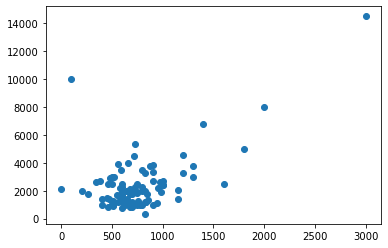

In [91]:
plt.scatter(df_no_nans.sq_ft, df_no_nans.rent)

In [41]:
df2.dropna(subset=['new_sq_ft', 'new_price'], inplace=True)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lm = LinearRegression()
lm.fit(np.array(df2.new_sq_ft).reshape(-1,1), df2.new_price)

LinearRegression()

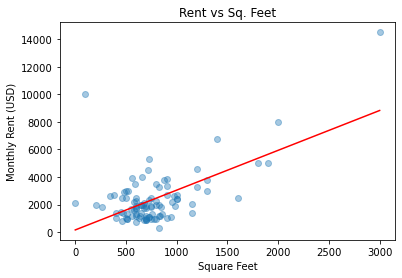

In [49]:
x = np.linspace(min(df2.new_sq_ft), max(df2.new_sq_ft), 1000)
plt.scatter(df2.new_sq_ft, df2.new_price, alpha=0.4)
plt.plot(x, x*lm.coef_[0]+lm.intercept_, c='r')
plt.xlabel('Square Feet')
plt.ylabel('Monthly Rent (USD)')
plt.title('Rent vs Sq. Feet')
plt.savefig('rent_vs_sq_ft.png', dpi=300)